# Comparison of fitting using ROOT and numpy histograms

### Gaussian distribution

what does numpy.random.normal do?

According to [the documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) we have:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

it draws random samples according to the normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ROOT import TCanvas, TH1F
%jsroot off
%matplotlib inline

Welcome to JupyROOT 6.22/06


First we crate a sample distribution

In [2]:
mean_sim = 400
sigma_sim = 40

data = np.random.normal(loc = mean_sim, scale = sigma_sim, size=10000)

we frist have a look using ROOT

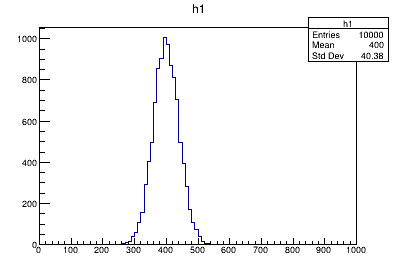

In [3]:
h1 = TH1F('h1', 'h1', 100, 0, 1000)
for ii in data:
    h1.Fill(ii)
c = TCanvas("c","c",400,300)
c.cd()
h1.Draw()
c.Draw()

Now we have a look using Numpy. Please pay attention that the parameter **range** is very important. In ROOT histograms, this task is taken care of by the Histogram object. Here you have to make sure you have the correct x-axis in Numpy histo.

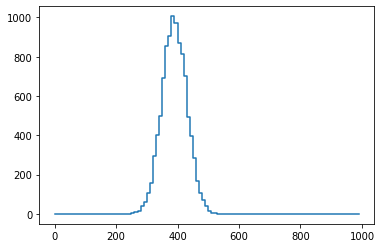

In [4]:
hist = np.histogram(data, bins=100, range=(0,1000))[0]
x = np.arange(0, 1000, 1000/100)
plt.step(x, hist)

now we define an exponential fit function

In [5]:
def fit_function(x, *p):
    # gauss
    return p[0] * np.exp(-(x - p[1]) ** 2 / (2. * p[2] ** 2))

# fit params and some initial values
y = hist
x = x
p = [10, 350, 10]

# do fit
popt, pcov = curve_fit(fit_function, x, y, p0=p)

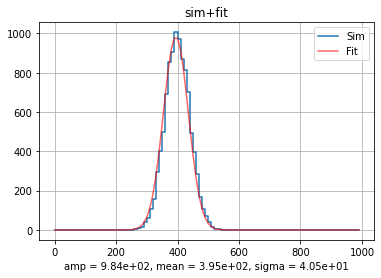

In [6]:
# plot fit and data

fig = plt.figure()
ax = fig.gca()
ax.step(x, y, label='Sim', where='post')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit', alpha=0.6)
ax.set_xlabel('amp = {:0.2e}, mean = {:0.2e}, sigma = {:0.2e}'.format(popt[0], popt[1], popt[2]))
ax.set_title('sim+fit')
legend = ax.legend(loc='upper right', shadow=False)
ax.grid()

Now we do the same with ROOT

 FCN=29.4955 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=1.23703e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.84967e+02   1.20591e+01   2.66055e-02  -4.54228e-05
   2  Mean         3.99879e+02   4.05125e-01   1.09240e-03   1.53806e-05
   3  Sigma        4.03915e+01   2.85273e-01   5.18527e-06  -2.25985e-01


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


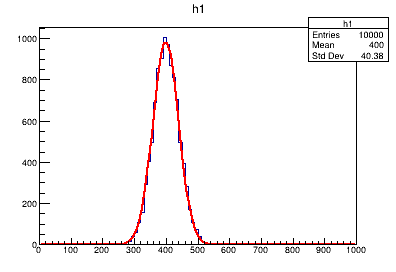

In [7]:
h1 = TH1F('h1', 'h1', 100, 0, 1000)
for ii in data:
    h1.Fill(ii)

h1.Fit('gaus', 'S')

c = TCanvas("c","c",400,300)
c.cd()
h1.Draw()
c.Draw()

In [8]:
gfit = h1.GetFunction('gaus')
const = gfit.GetParameter(0)
mean = gfit.GetParameter(1)
sigma = gfit.GetParameter(2)

In [9]:
print(f'Seed mean = {mean_sim}, sigma = {sigma_sim}')
print(f'ROOT mean = {mean}, sigma = {sigma}')
print(f'Numpy mean = {popt[1]}, sigma = {popt[2]}')

Seed mean = 400, sigma = 40
ROOT mean = 399.8792450144178, sigma = 40.3914949490922
Numpy mean = 394.5945728060125, sigma = 40.54517110849455


### Exponential distribution

what does numpy.random.exponential do?

According to [the documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) we have:

$$f\left(x; \frac{1}{\tau}\right)=\frac{1}{\tau}e^{\frac{-x}{\tau}}$$

it draws random samples according to the exponential distribution, where $\tau$ is mean life time. It is scaled / normalized to $\tau$ itself.

First we crate a sample distribution

In [10]:
tau_sim = 333

data = np.random.exponential(tau_sim, size=10000)

First we have a look using ROOT

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


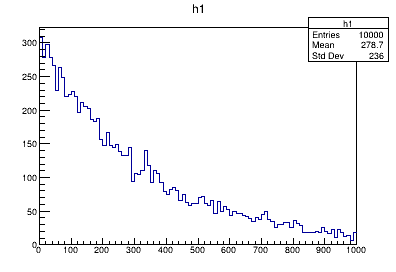

In [11]:
h1 = TH1F('h1', 'h1', 100, 0, 1000)
for ii in data:
    h1.Fill(ii)
c = TCanvas("c","c",400,300)
c.cd()
h1.Draw()
c.Draw()

Now we use Numpy histogram

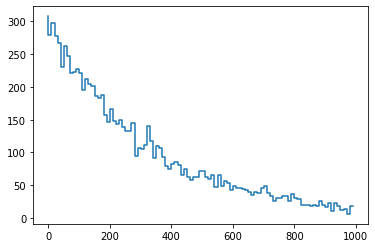

In [12]:
hist = np.histogram(data, bins=100, range=(0,1000))[0]
x = np.arange(0, 1000, 1000/100)

plt.step(x, hist)

now we define an exponential fit function

In [13]:
def fit_function(x, *p):
    # Exponential function
    return p[0] * np.exp(-x / p[1])

# fit params and some initial values
y = hist
x = x
p = [1, 400]

# do fit
popt, pcov = curve_fit(fit_function, x, y, p0=p)

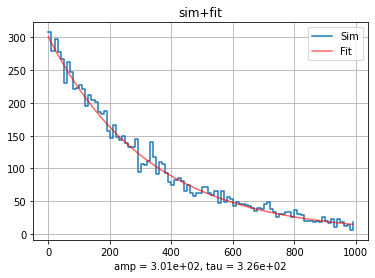

In [14]:
# plot fit and data

fig = plt.figure()
ax = fig.gca()
ax.step(x, y, label='Sim', where='post')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit', alpha=0.6)
ax.set_xlabel('amp = {:0.2e}, tau = {:0.2e}'.format(popt[0], popt[1]))
ax.set_title('sim+fit')
legend = ax.legend(loc='upper right', shadow=False)
ax.grid()

Now we do the same with ROOT

 FCN=100.834 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=1.63309e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.72093e+00   1.59045e-02   5.07710e-05  -3.17936e-04
   2  Slope       -3.09297e-03   4.39182e-05   1.40189e-07   3.16982e-01


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


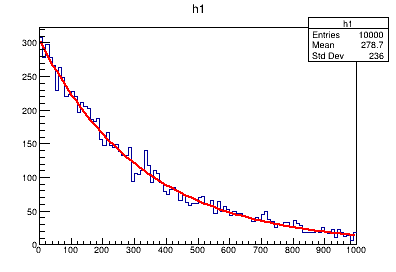

In [15]:
h1 = TH1F('h1', 'h1', 100, 0, 1000)
for ii in data:
    h1.Fill(ii)

h1.Fit('expo', 'S')

c = TCanvas("c","c",400,300)
c.cd()
h1.Draw()
c.Draw()

In [16]:
gfit = h1.GetFunction('expo')
const = gfit.GetParameter(0)
lambda_root = gfit.GetParameter(1)
tau_root = -1/lambda_root

In [17]:
print(f'Seed tau = {tau_sim}')
print(f'ROOT tau = {tau_root}')
print(f'Numpy tau = {popt[1]}')

Seed tau = 333
ROOT tau = 323.31377273972276
Numpy tau = 326.3619681357957
